In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
import os
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras import layers
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.callbacks import EarlyStopping

In [24]:
Data   ='/content/drive/My Drive/images/'
for image_class in os.listdir(Data):
    print(image_class)

.DS_Store
BELTED KINGFISHER
VIOLET GREEN SWALLOW
ANNAS HUMMINGBIRD
BLACK-CAPPED CHICKADEE
AMERICAN ROBIN
RED WINGED BLACKBIRD
DARK EYED JUNCO
DOWNY WOODPECKER
AMERICAN CROW
HOUSE FINCH
NORTHERN FLICKER
HOUSE SPARROW
AMERICAN GOLDFINCH
RED HEADED WOODPECKER
BLACK-THROATED SPARROW
CHIPPING SPARROW
CEDAR WAXWING
BARN SWALLOW


In [25]:

img_data = tf.keras.utils.image_dataset_from_directory(Data)


Found 1800 files belonging to 18 classes.


In [59]:
img_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [26]:
datagen = ImageDataGenerator(rescale=1./255,rotation_range=45,horizontal_flip=True,vertical_flip=True,fill_mode='reflect',validation_split=0.3)

train = datagen.flow_from_directory(Data,batch_size=32,target_size=(256,256),class_mode="categorical",subset="training")

test = datagen.flow_from_directory(Data,batch_size=32,target_size=(256,256),class_mode="categorical",subset="validation")

Found 1260 images belonging to 18 classes.
Found 540 images belonging to 18 classes.


In [32]:
for image_batch, labels_batch in train:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 256, 256, 3)
(32, 18)


In [27]:
callback = keras.callbacks.EarlyStopping(monitor='accuracy', patience=10)

In [46]:
model=tf.keras.models.Sequential()
model.add(layers.Conv2D(32,(3,3),input_shape=[256,256,3],activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(32,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(256,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(256,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(18, activation='sigmoid'))

In [53]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


In [49]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 127, 127, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 60, 60, 64)        18496     
                                                                 
 conv2d_23 (Conv2D)          (None, 58, 58, 64)       

In [48]:
model.fit(train,epochs=100,batch_size=64,validation_data=(test),callbacks=[callback],)


Epoch 1/100
40/40 [==============================] - 386s 10s/step - loss: 2.8929 - accuracy: 0.0516 - val_loss: 2.8870 - val_accuracy: 0.0815
Epoch 2/100
40/40 [==============================] - 164s 4s/step - loss: 2.7489 - accuracy: 0.1278 - val_loss: 2.5215 - val_accuracy: 0.2037
Epoch 3/100
40/40 [==============================] - 166s 4s/step - loss: 2.5949 - accuracy: 0.1635 - val_loss: 2.3678 - val_accuracy: 0.2333
Epoch 4/100
40/40 [==============================] - 165s 4s/step - loss: 2.4185 - accuracy: 0.2127 - val_loss: 2.2966 - val_accuracy: 0.2481
Epoch 5/100
40/40 [==============================] - 164s 4s/step - loss: 2.3447 - accuracy: 0.2492 - val_loss: 2.1806 - val_accuracy: 0.2796
Epoch 6/100
40/40 [==============================] - 164s 4s/step - loss: 2.2203 - accuracy: 0.2857 - val_loss: 2.1434 - val_accuracy: 0.3333
Epoch 7/100
40/40 [==============================] - 165s 4s/step - loss: 2.1533 - accuracy: 0.3190 - val_loss: 2.0475 - val_accuracy: 0.3315
Epoch

## Trying with only one pooling and 10 epochs

In [52]:
model = tf.keras.models.Sequential()
model.add(layers.Conv2D(32, (3,3), input_shape=[256,256,3], activation='relu'))
model.add(layers.MaxPooling2D(3,3))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(18, activation='sigmoid'))

In [54]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [55]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 84, 84, 32)       0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 225792)            0         
                                                                 
 dropout_5 (Dropout)         (None, 225792)            0         
                                                                 
 dense_9 (Dense)             (None, 64)                14450752  
                                                                 
 dense_10 (Dense)            (None, 18)                1170      
                                                      

In [56]:
model.fit(train,epochs=10,batch_size=64,validation_data=(test),callbacks=[callback],)

Epoch 1/10
40/40 [==============================] - 85s 2s/step - loss: 6.0703 - accuracy: 0.0508 - val_loss: 2.8904 - val_accuracy: 0.0556
Epoch 2/10
40/40 [==============================] - 85s 2s/step - loss: 2.8905 - accuracy: 0.0540 - val_loss: 2.8904 - val_accuracy: 0.0556
Epoch 3/10
40/40 [==============================] - 83s 2s/step - loss: 2.8907 - accuracy: 0.0460 - val_loss: 2.8904 - val_accuracy: 0.0556
Epoch 4/10
40/40 [==============================] - 84s 2s/step - loss: 2.8906 - accuracy: 0.0548 - val_loss: 2.8904 - val_accuracy: 0.0556
Epoch 5/10
40/40 [==============================] - 82s 2s/step - loss: 2.8906 - accuracy: 0.0444 - val_loss: 2.8904 - val_accuracy: 0.0556
Epoch 6/10
40/40 [==============================] - 84s 2s/step - loss: 2.8906 - accuracy: 0.0556 - val_loss: 2.8904 - val_accuracy: 0.0556
Epoch 7/10
40/40 [==============================] - 83s 2s/step - loss: 2.8906 - accuracy: 0.0556 - val_loss: 2.8904 - val_accuracy: 0.0556
Epoch 8/10
40/40 [==

## Another try

In [51]:
for image_batch, labels_batch in train:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 256, 256, 3)
(32, 18)


In [ ]:
image_batch[0][0]

In [93]:

from keras.layers.pooling.max_pooling2d import Pooling2D
# building a linear stack of layers with the sequential model
model = Sequential()
# convolutional layer
model.add(Conv2D(25, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(3,3), strides=2))

# convolutional layer
model.add(Conv2D(50, kernel_size=(3,3),  padding='valid', activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(3,3), strides=2))

# convolutional layer
model.add(Conv2D(70, kernel_size=(3,3),  padding='valid', activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(3,3), strides=2))


# convolutional layer
model.add(Conv2D(100, kernel_size=(3,3),  padding='valid', activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(3,3), strides=2))

# flatten output of conv
model.add(Flatten())
# hidden layer
model.add(Dense(100, activation='relu'))
model.add(Dense(units=100, activation='relu'))
model.add(Dropout(0.25))

# output layer
model.add(Dense(18, activation='softmax'))

# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')


In [ ]:
model.fit(train,epochs=10,batch_size=100,validation_data=(test),callbacks=[callback],)

Epoch 1/10
40/40 [==============================] - 194s 5s/step - loss: 2.7625 - accuracy: 0.1167 - val_loss: 2.5912 - val_accuracy: 0.1907
Epoch 2/10
40/40 [==============================] - 193s 5s/step - loss: 2.5991 - accuracy: 0.1770 - val_loss: 2.4481 - val_accuracy: 0.2389
Epoch 3/10
40/40 [==============================] - 189s 5s/step - loss: 2.4780 - accuracy: 0.1968 - val_loss: 2.2861 - val_accuracy: 0.2426
Epoch 4/10
40/40 [==============================] - 191s 5s/step - loss: 2.3403 - accuracy: 0.2413 - val_loss: 2.2101 - val_accuracy: 0.2981
Epoch 5/10
40/40 [==============================] - 192s 5s/step - loss: 2.3290 - accuracy: 0.2405 - val_loss: 2.2418 - val_accuracy: 0.2907
Epoch 6/10
40/40 [==============================] - 191s 5s/step - loss: 2.1941 - accuracy: 0.2929 - val_loss: 2.0682 - val_accuracy: 0.3074
Epoch 7/10
40/40 [==============================] - 192s 5s/step - loss: 2.1867 - accuracy: 0.3040 - val_loss: 2.0541 - val_accuracy: 0.3537
Epoch 8/10
40

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [78]:
image_size = (256, 256)
batch_size = 128

train_ds = tf.keras.utils.image_dataset_from_directory(
    Data,
    validation_split=0.2,
    subset="training",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

Found 1800 files belonging to 18 classes.
Using 1440 files for training.


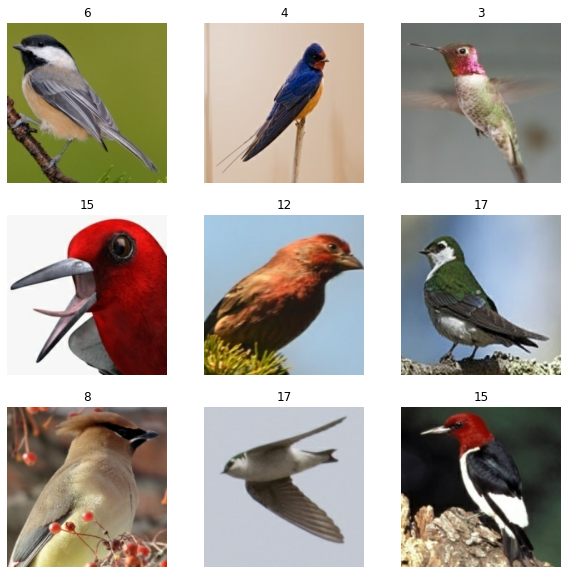

In [82]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")